# Checking the stitching of DNN training samples

In [1]:
import uproot
from pathlib import Path
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import hist
import mplhep as hep

In [68]:
def full_load_dir(d_list, filter_name=["DNN*", "LHE_Vpt", "madHT", "genWeightFixed", "DYstitchWeight"]):
    if isinstance(d_list, str): d_list = [d_list]
    paths = []
    sum_genw = 0.
    base_entries =0
    for d in d_list:
        path_count = 0
        for path in Path(d).glob('*.root'):
            if "_up" in path.name or "_down" in path.name: continue
            paths.append(path)
            path_count += 1
            with uproot.open(path) as f:
                sum_genw += f["sum_genw"].values()[0]
                base_entries += f["sum_genw"].all_members["fEntries"]
        if path_count == 0: raise ValueError(d)
    return dict(ar=uproot.concatenate(paths, filter_name=filter_name), sum_genw=sum_genw, base_entries=base_entries)

In [ ]:
zz_vpt, _ = full_load_dir("/grid_mnt/data__data.polcms/cms/cuisset/cmt/Categorization/bul_2018_ZZ_v12/zz_bbtt_vptFilter_dnnTraining/cat_ZZ_elliptical_cut_90_DNNtraining/prod_250315_DNN_0425")
zz_incl_private, _ = full_load_dir("/grid_mnt/data__data.polcms/cms/cuisset/cmt/Categorization/bul_2018_ZZ_v12/zz_bbtt_dnnTraining/cat_ZZ_elliptical_cut_90_DNNtraining/prod_250315_DNN_0425")
zz_incl_central, _ = full_load_dir("/grid_mnt/data__data.polcms/cms/cuisset/cmt/Categorization/bul_2018_ZZ_v12/zz_sl_signal/cat_ZZ_elliptical_cut_90_DNNtraining/prod_250315_DNN_0425")

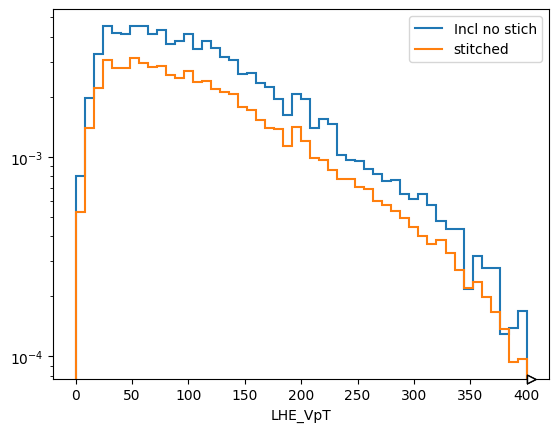

In [31]:
hep.histplot(hist.new.Regular(50, 0., 400, name="LHE_VpT").Weight().fill(zz_incl_central.LHE_Vpt, weight=(zz_incl_central.genWeightFixed)/np.sum(zz_incl_central.genWeightFixed)*0.1), yerr=False, label="Incl no stich")
hep.histplot(
    hist.new.Regular(50, 0., 400, name="LHE_VpT").Weight()
    .fill(zz_incl_central.LHE_Vpt, weight=zz_incl_central.DNNgenWeight*zz_incl_central.DNNStitchWeight)
    .fill(zz_incl_private.LHE_Vpt, weight=zz_incl_private.DNNgenWeight*zz_incl_private.DNNStitchWeight)
    .fill(zz_vpt.LHE_Vpt, weight=zz_vpt.DNNgenWeight*zz_vpt.DNNStitchWeight)
, yerr=False, label="stitched")
plt.yscale("log")
plt.legend()

### Drell-Yan

In [60]:
dy_dict = {dataset :  full_load_dir(f"/grid_mnt/data__data.polcms/cms/cuisset/cmt/Categorization/bul_2018_ZZ_v12/{dataset}/cat_ZZ_elliptical_cut_90_DNNtraining/prod_250315_DNN_0425") for dataset in ["dy"] + [f"dy_ptz{i}" for i in range(1, 6+1)] + ["dy_0j", "dy_1j", "dy_2j"]}
dy_dict

{'dy': {'ar': <Array [{LHE_Vpt: 96, ...}, {...}, ..., {...}] type='27693 * {LHE_Vpt: floa...'>,
  'sum_genw': 3347845355926.994,
  'base_entries': 196946491.0},
 'dy_ptz1': {'ar': <Array [{LHE_Vpt: 21, ...}, {...}, ..., {...}] type='27852 * {LHE_Vpt: floa...'>,
  'sum_genw': 2454475669840.1484,
  'base_entries': 198214727.0},
 'dy_ptz2': {'ar': <Array [{LHE_Vpt: 68, ...}, {...}, ..., {...}] type='49866 * {LHE_Vpt: floa...'>,
  'sum_genw': 566950058181.7188,
  'base_entries': 120643424.0},
 'dy_ptz3': {'ar': <Array [{LHE_Vpt: 231, ...}, {...}, ..., {...}] type='86247 * {LHE_Vpt: flo...'>,
  'sum_genw': 33987072918.771973,
  'base_entries': 56500410.0},
 'dy_ptz4': {'ar': <Array [{LHE_Vpt: 292, ...}, {...}, ..., {...}] type='268710 * {LHE_Vpt: fl...'>,
  'sum_genw': 352919244.69202423,
  'base_entries': 23068060.0},
 'dy_ptz5': {'ar': <Array [{LHE_Vpt: 537, ...}, {...}, ..., {...}] type='56527 * {LHE_Vpt: flo...'>,
  'sum_genw': 5898746.228478432,
  'base_entries': 3456081.0},
 'dy_ptz6'

In [61]:
dy_nom = dy_dict["dy"]["ar"]
dy_dict

{'dy': {'ar': <Array [{LHE_Vpt: 96, ...}, {...}, ..., {...}] type='27693 * {LHE_Vpt: floa...'>,
  'sum_genw': 3347845355926.994,
  'base_entries': 196946491.0},
 'dy_ptz1': {'ar': <Array [{LHE_Vpt: 21, ...}, {...}, ..., {...}] type='27852 * {LHE_Vpt: floa...'>,
  'sum_genw': 2454475669840.1484,
  'base_entries': 198214727.0},
 'dy_ptz2': {'ar': <Array [{LHE_Vpt: 68, ...}, {...}, ..., {...}] type='49866 * {LHE_Vpt: floa...'>,
  'sum_genw': 566950058181.7188,
  'base_entries': 120643424.0},
 'dy_ptz3': {'ar': <Array [{LHE_Vpt: 231, ...}, {...}, ..., {...}] type='86247 * {LHE_Vpt: flo...'>,
  'sum_genw': 33987072918.771973,
  'base_entries': 56500410.0},
 'dy_ptz4': {'ar': <Array [{LHE_Vpt: 292, ...}, {...}, ..., {...}] type='268710 * {LHE_Vpt: fl...'>,
  'sum_genw': 352919244.69202423,
  'base_entries': 23068060.0},
 'dy_ptz5': {'ar': <Array [{LHE_Vpt: 537, ...}, {...}, ..., {...}] type='56527 * {LHE_Vpt: flo...'>,
  'sum_genw': 5898746.228478432,
  'base_entries': 3456081.0},
 'dy_ptz6'

In [71]:
dy_nom

<Array [{LHE_Vpt: 96, ...}, {...}, ..., {...}] type='27693 * {LHE_Vpt: floa...'>

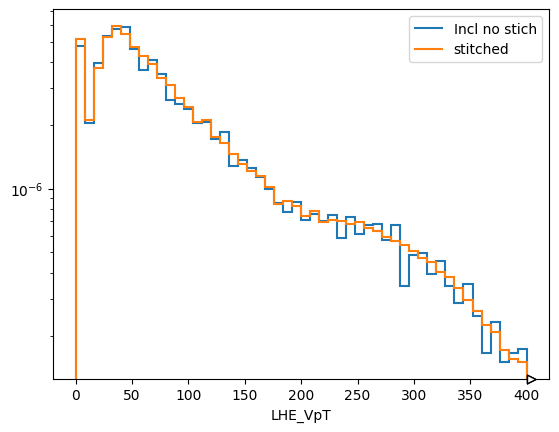

In [66]:
hep.histplot(hist.new.Regular(50, 0., 400, name="LHE_VpT").Weight().fill(dy_nom.LHE_Vpt, weight=(dy_nom.genWeightFixed)/dy_dict["dy"]["sum_genw"]), yerr=False, label="Incl no stich")
h = hist.new.Regular(50, 0., 400, name="LHE_VpT").Weight()
for dataset, d in dy_dict.items():
    ar = d["ar"]
    h.fill(ar.LHE_Vpt, weight=ar.genWeightFixed*ar.DYstitchWeight*ar.DNNStitchWeight/(d["sum_genw"]))
hep.histplot(h, yerr=False, label="stitched")
plt.yscale("log")
plt.legend()

## ttbar HT

In [110]:
tt_dict = {dataset :  full_load_dir(f"/grid_mnt/data__data.polcms/cms/cuisset/cmt/Categorization/bul_2018_ZZ_v12/{dataset}/cat_ZZ_elliptical_cut_90_DNNtraining/prod_250315b_madHT",
                                    filter_name=["DNN*", "madHT", "genWeightFixed", "LHE_HT"]) for dataset in ["tt_sl", "tt_fh", "tt_dl", "tt_ht600", "tt_ht800", "tt_ht1200"]}
tt_dict

{'tt_sl': {'ar': <Array [{LHE_HT: 298, ...}, {...}, ..., {...}] type='9273056 * {LHE_HT: flo...'>,
  'sum_genw': 143744839773.41064,
  'base_entries': 477706000.0},
 'tt_fh': {'ar': <Array [{LHE_HT: 442, ...}, {...}, ..., {...}] type='30629 * {LHE_HT: float...'>,
  'sum_genw': 106735754836.79199,
  'base_entries': 340021000.0},
 'tt_dl': {'ar': <Array [{LHE_HT: 145, ...}, {...}, ..., {...}] type='4077047 * {LHE_HT: flo...'>,
  'sum_genw': 10100447369.50476,
  'base_entries': 140067000.0},
 'tt_ht600': {'ar': <Array [{LHE_HT: 990, ...}, {...}, ..., {...}] type='224113 * {LHE_HT: floa...'>,
  'sum_genw': 15258099.0,
  'base_entries': 15258099.0},
 'tt_ht800': {'ar': <Array [{LHE_HT: 1.11e+03, ...}, ..., {...}] type='167800 * {LHE_HT: float3...'>,
  'sum_genw': 9201990.0,
  'base_entries': 9201990.0},
 'tt_ht1200': {'ar': <Array [{LHE_HT: 1.98e+03, ...}, ..., {...}] type='45030 * {LHE_HT: float32...'>,
  'sum_genw': 2009331.0,
  'base_entries': 2009331.0}}

In [111]:
tt_dict["tt_sl"]["ar"]

<Array [{LHE_HT: 298, ...}, {...}, ..., {...}] type='9273056 * {LHE_HT: flo...'>

(1e-06, 0.01)

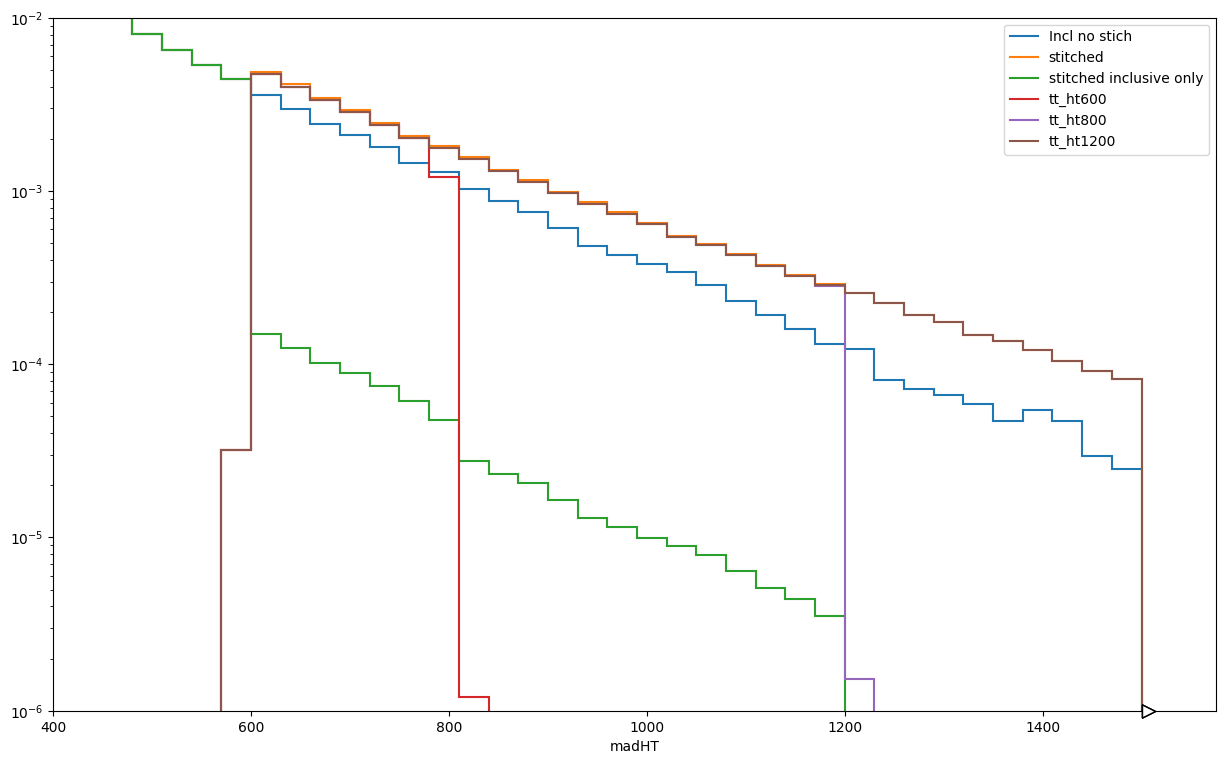

In [116]:
plt.figure(figsize=(15, 9))
xs = {
    "tt_dl":            88.29,                    # XSDB NNLO (from theory) +4.8%-6.1%
    "tt_sl":            365.34,                   # XSDB NNLO (from theory) +4.8%-6.1%
    "tt_fh":            377.96,                   # XSDB NNLO (from theory) +4.8%-6.1%	
        "tt_ht600":         1.402,
    "tt_ht800":         0.5581,
    "tt_ht1200":        0.09876,
    "tt_ht2500":        0.001124,
}
var = "madHT"
hep.histplot(
    hist.new.Regular(50, 0., 1500, name=var).Weight().fill(tt_dict["tt_sl"]["ar"][var], weight=xs["tt_sl"]*(tt_dict["tt_sl"]["ar"].genWeightFixed)/tt_dict["tt_sl"]["sum_genw"]).fill(tt_dict["tt_dl"]["ar"][var], weight=xs["tt_dl"]*(tt_dict["tt_dl"]["ar"].genWeightFixed)/tt_dict["tt_dl"]["sum_genw"]).fill(tt_dict["tt_fh"]["ar"][var], weight=xs["tt_fh"]*(tt_dict["tt_fh"]["ar"].genWeightFixed)/tt_dict["tt_fh"]["sum_genw"])
, yerr=False, label="Incl no stich")
h = hist.new.Regular(50, 0., 1500, name=var).Weight()
for dataset, d in tt_dict.items():
    ar = d["ar"]
    h.fill(ar[var], weight=xs[dataset]*ar.genWeightFixed*ar.DNNStitchWeight/(d["sum_genw"]))
hep.histplot(h, yerr=False, label="stitched")

h_incl = hist.new.Regular(50, 0., 1500, name=var).Weight()
for dataset, d in tt_dict.items():
    if dataset not in ["tt_sl", "tt_fh", "tt_dl"]:continue
    ar = d["ar"]
    h_incl.fill(ar[var], weight=xs[dataset]*ar.genWeightFixed*ar.DNNStitchWeight/(d["sum_genw"]))
hep.histplot(h_incl, yerr=False, label="stitched inclusive only")

h_ht = hist.new.Regular(50, 0., 1500, name=var).Weight()
for dataset, d in tt_dict.items():
    if not "_ht" in dataset: continue
    ar = d["ar"]
    h_ht.fill(ar[var], weight=xs[dataset]*ar.genWeightFixed*ar.DNNStitchWeight/(d["sum_genw"]))
    hep.histplot(h_ht, yerr=False, label=dataset)

plt.yscale("log")
plt.legend()
plt.xlim(left=400)
plt.ylim(1e-6, 1e-2)

(500.0, 1575.0)

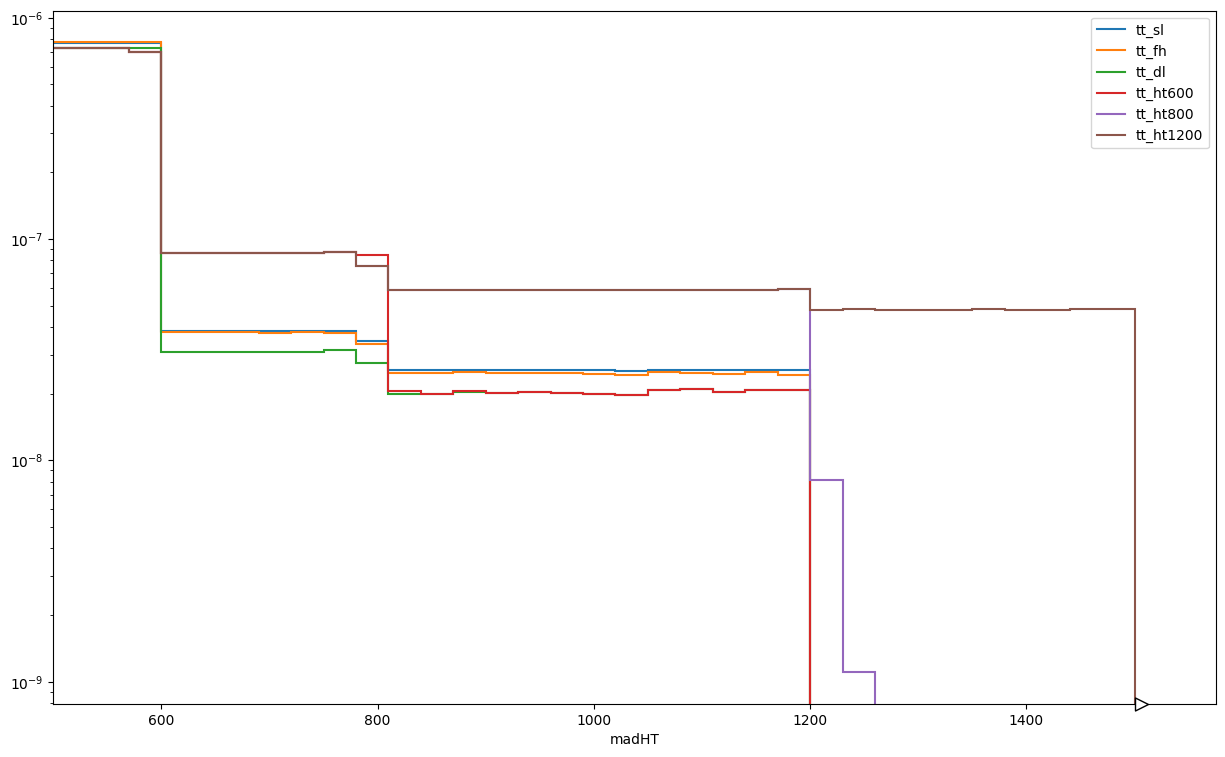

In [135]:
plt.figure(figsize=(15, 9))
h = hist.new.Regular(50, 0., 1500, name=var).Mean()
for dataset, d in tt_dict.items():
    ar = d["ar"]
    h.fill(ar[var], sample=xs[dataset]*ar.genWeightFixed*ar.DNNStitchWeight/(d["sum_genw"]))
    hep.histplot(h, yerr=False, label=dataset)
plt.yscale("log")
plt.legend()
plt.xlim(left=500)

In [133]:
1./ak.count_nonzero((600 < tt_dict["tt_fh"]["ar"].madHT)&(800 > tt_dict["tt_fh"]["ar"].madHT)) * len(tt_dict["tt_ht600"]["ar"])

471.81684210526316